# Capstone Project 2
## Predicting *vinho verde* wine quality from physicochemical data

In this set, several thousand samples of Portugese *vinho verde* wine are measured in 11 physicochemical parameters. The data are labeled with a subjective quality score on a scale of 0 to 10 (representing very bad and excellent quality, respectively). 

### Part 1: Data Wrangling

In this study, I will examine the wine quality dataset hosted by UCI:

https://archive.ics.uci.edu/ml/datasets/wine+quality

The data are downloaded to a local folder. First, let's have a look at the data set description:

In [1]:
!pwd

/Users/jeffreykoskulics/Springboard/Capstone2/notebooks


In [2]:
!cat ../downloads/DataSetDescription/winequality.names

Now, let's look at the data itself. There are several files to look at:

In [3]:
!ls ../downloads/DataFolder

winequality-red.csv   winequality-white.csv winequality.names


Let's read the csv files and print the winequality.names. 

In [4]:
import pandas as pd
reds = pd.read_csv('../downloads/DataFolder/winequality-red.csv')
whites = pd.read_csv('../downloads/DataFolder/winequality-white.csv')
!cat ../downloads/DataFolder/winequality.names

It looks like the winequality.names file is identical to the file in the DataSetDescription. Next, let's inspect the red dataframe:

In [5]:
reds.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


Looks like I got it wrong! Let's re-read the csv file, this time using the ';' character as a separator:

In [6]:
reds = pd.read_csv('../downloads/DataFolder/winequality-red.csv',sep=';')
whites = pd.read_csv('../downloads/DataFolder/winequality-white.csv',sep=';')
reds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
whites.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Ahh, that's more like it! The data appear well-formed with labels on each column and reasonable looking values in each feature. Next, let's check to see if there are any missing values:

In [8]:
reds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
whites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


So far, there are no obvious non-null values. Let's look to see boxplots to check for possible outliers:

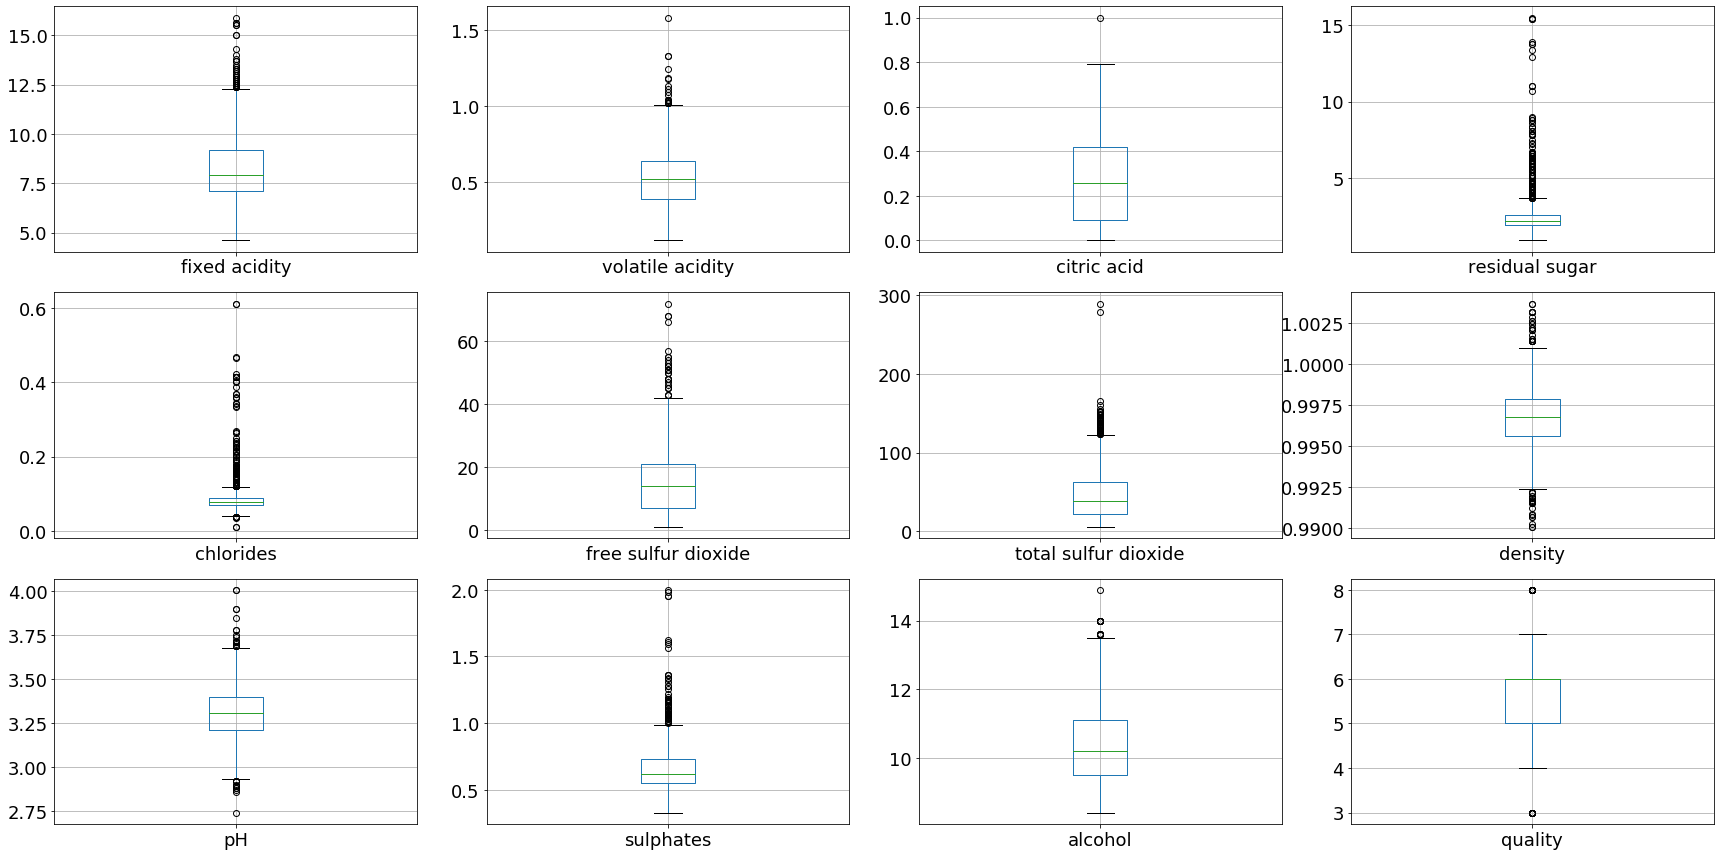

In [10]:
import matplotlib.pyplot as plt

def boxplots(df):
    num_columns = len(df.columns)
    col_names = df.columns
    plt.figure(figsize=(24,12))
    for i, col in enumerate(col_names):
        plt.subplot(3,num_columns//3,i+1)
        df.boxplot(column = col,fontsize=18)
    plt.tight_layout()
    plt.show()
    
boxplots(reds)

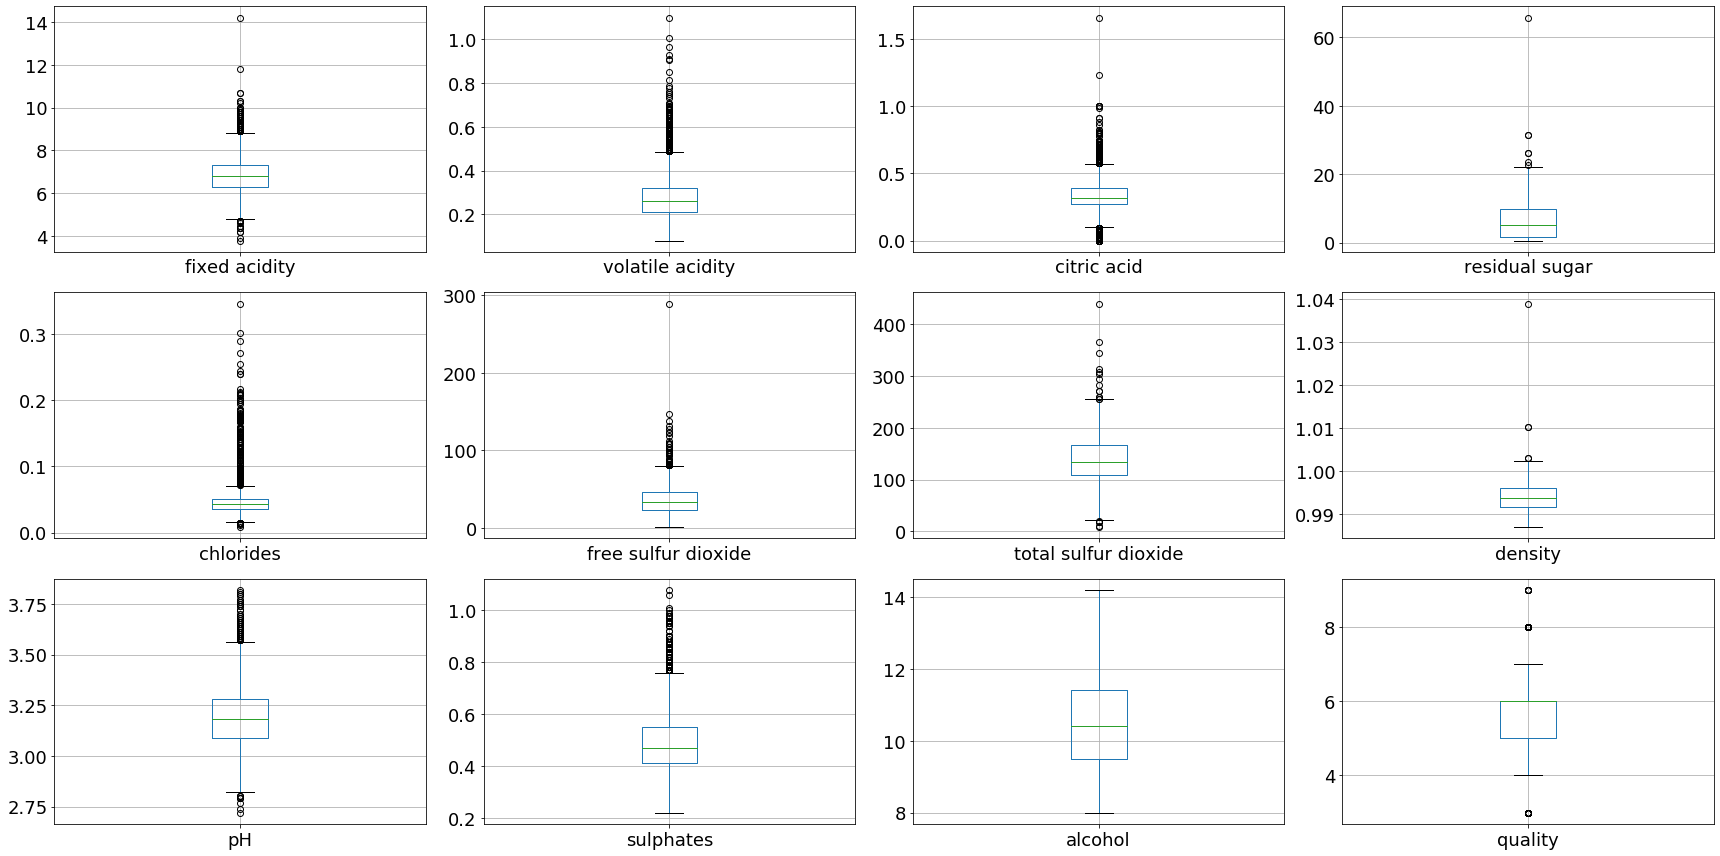

In [11]:
boxplots(whites)

Based on these boxplots, I don't see any obviously unreasonable looking outliers. 

One question we'll want to explore is the role of red vs. white wine quality. Will we want a single, unified model to predict the quality of both reds and whites? We can always split the analysis so that each are treated independently. 

Furthermore, should we treate red or white as a categorical feature or perhaps even a target value? I don't see any spectroscopic measurements that could indicate directly how we perceive a color. It would be interesting to know if we can predict the red/white category from these other measurements!

We'll leave these questions for later. For now, I'll join the two data sets by including a red/white categorical feature and save the resulting data frame for analysis in later steps.

In [12]:
whites['type'] = 'white'
reds['type'] = 'red'

all_wines = pd.concat([whites,reds])
all_wines.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3187,6.7,0.18,0.37,1.3,0.027,42.0,125.0,0.98939,3.24,0.37,12.8,7,white
3040,6.3,0.20,0.37,11.8,0.045,58.0,130.0,0.99519,3.20,0.35,10.8,5,white
2390,7.0,0.28,0.26,1.7,0.042,34.0,130.0,0.99250,3.43,0.50,10.7,8,white
4251,7.0,0.24,0.24,1.8,0.047,29.0,91.0,0.99251,3.30,0.43,9.9,6,white
878,8.8,0.61,0.19,4.0,0.094,30.0,69.0,0.99787,3.22,0.50,10.0,6,red
769,7.9,0.72,0.01,1.9,0.076,7.0,32.0,0.99668,3.39,0.54,9.6,5,red
2740,6.3,0.20,0.19,12.3,0.048,54.0,145.0,0.99668,3.16,0.42,9.3,6,white
898,6.6,0.26,0.29,1.4,0.039,13.0,67.0,0.99150,3.05,0.49,10.9,6,white
1316,5.4,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,red
706,7.0,0.78,0.08,2.0,0.093,10.0,19.0,0.99560,3.40,0.47,10.0,5,red


Looks good. Let's change the 'type' column to a dummy variable

In [13]:
all_wines = pd.get_dummies(all_wines,drop_first=True)

In [14]:
all_wines.to_csv('../data/all_wines.csv', index=False)